In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [5]:
measurement = Base.classes.measurement
station = Base.classes.station

In [6]:
session=Session(engine)

# Investigate the Database

In [7]:
from sqlalchemy import inspect
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
columns = inspector.get_columns('measurement')
for c in columns:
    primarykeystr = ""
    if c['primary_key'] == 1:
        primarykeystr = "Primary Key"
    print(c["name"],c["type"],primarykeystr)

id INTEGER Primary Key
station TEXT 
date TEXT 
prcp FLOAT 
tobs FLOAT 


In [9]:
columns = inspector.get_columns('station')
for c in columns:
    primarykeystr = ""
    if c['primary_key'] == 1:
        primarykeystr = "Primary Key"
    print(c["name"], c["type"], primarykeystr)

id INTEGER Primary Key
station TEXT 
name TEXT 
latitude FLOAT 
longitude FLOAT 
elevation FLOAT 


# Exploratory Precipitation Analysis

In [10]:
recdate = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recdate[0])

2017-08-23


In [11]:
recdate1 = dt.datetime.strptime(recdate[0], '%Y-%m-%d')
yeardate = dt.date(recdate1.year -1, recdate1.month, recdate1.day)
print(yeardate)

2016-08-23


In [13]:
prec= [measurement.date,measurement.prcp]
yeardateprec = session.query(*prec).filter(measurement.date >= yeardate).all()
precdf = (pd.DataFrame(yeardateprec, columns=['Date','Precipitation']).sort_values(["Date"], ascending=True)).dropna()
precdf

,Date,Precipitation
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


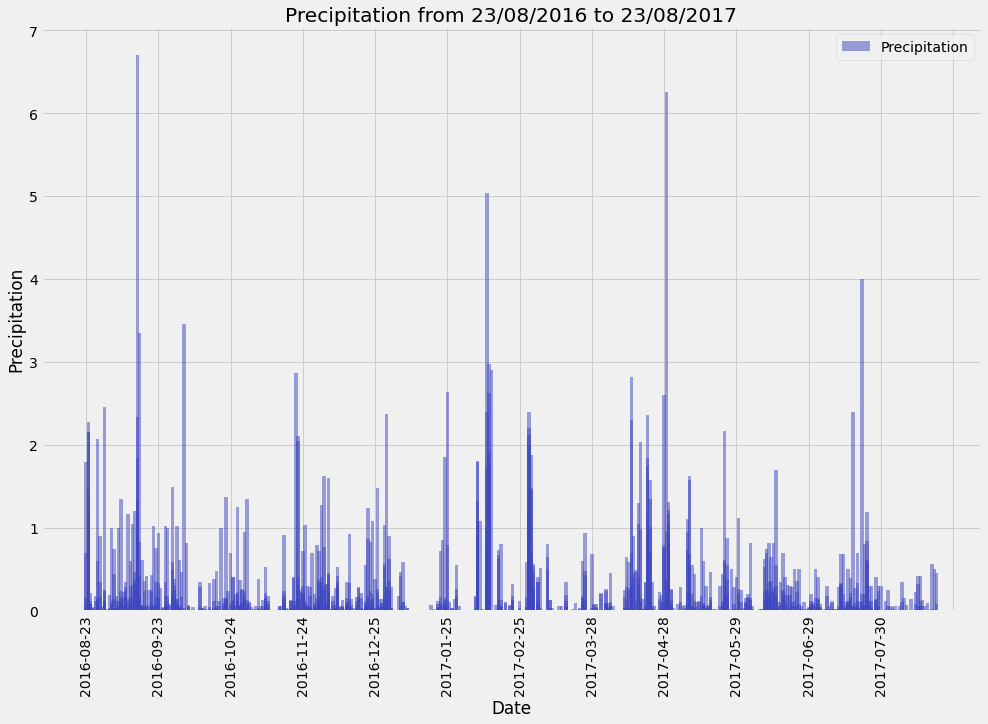

In [47]:
ax,plot=plt.subplots (figsize=(15, 10))
plt.bar(precdf["Date"],precdf["Precipitation"], color = '#3d46bf',alpha=0.5,label='Precipitation',width=1.5)
plt.xticks(np.arange(0,400,31),rotation=90)  
plt.legend ()
plt.title("Precipitation from 23/08/2016 to 23/08/2017")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.grid( linestyle='-')
plt.show()

In [48]:
precdf.describe ()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis